In [6]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [17]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


In [18]:
training_data[0][0].shape

torch.Size([1, 28, 28])

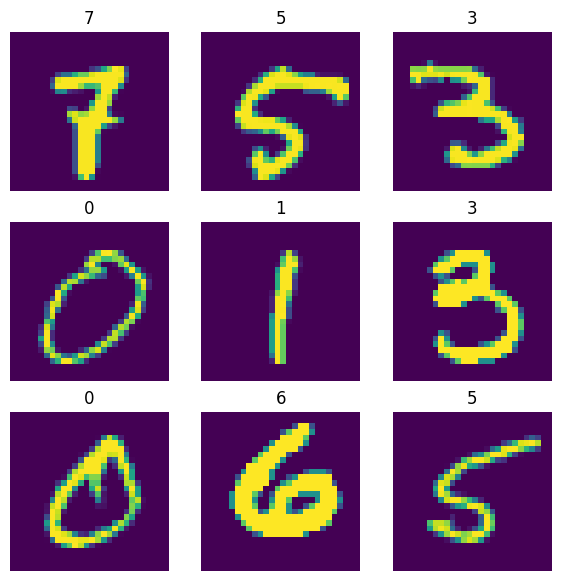

In [22]:
fig, axes = plt.subplots(3,3, figsize=(7,7))

for i, j in [(i,j) for i in range(3) for j in range(3)]:
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    axes[i, j].set_title(label)
    axes[i, j].axis('off')
    axes[i, j].imshow(img[0])

In [52]:
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np

writer = SummaryWriter(
    max_queue=1,
    flush_secs=5
)

In [ ]:
for i in range(10):
    writer.add_scalar('Det/Linear', i, i)
    writer.add_scalar('Det/Quad', i**2 - 4*i, i)
    writer.add_scalar('Stoch/np.random', np.random.random(), i)

In [51]:
!rm -r runs

In [53]:
for i in range(10):
    writer.add_scalar('Sloww/Det/Linear', 7 + np.random.random(), i)
    writer.add_scalar('Sloww/Det/Quad', -i**2 + 7*np.random.random(), i)
    writer.add_scalar('Sloww/Stoch/np.random', np.random.random() ** 2, i)
    time.sleep(10)

In [44]:
SummaryWriter?

Init signature:
SummaryWriter(
    log_dir=None,
    comment='',
    purge_step=None,
    max_queue=10,
    flush_secs=120,
    filename_suffix='',
)
Docstring:     
Writes entries directly to event files in the log_dir to be consumed by TensorBoard.

The `SummaryWriter` class provides a high-level API to create an event file
in a given directory and add summaries and events to it. The class updates the
file contents asynchronously. This allows a training program to call methods
to add data to the file directly from the training loop, without slowing down
training.
Init docstring:
Create a `SummaryWriter` that will write out events and summaries to the event file.

Args:
    log_dir (str): Save directory location. Default is
      runs/**CURRENT_DATETIME_HOSTNAME**, which changes after each run.
      Use hierarchical folder structure to compare
      between runs easily. e.g. pass in 'runs/exp1', 'runs/exp2', etc.
      for each new experiment to compare across them.
    comment (str)